# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#reading csv from google drive
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
#HTML converter
!pip install nbconvert



In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/FoodHub_Project/'
!jupyter nbconvert --to html FDS_Project_LearnerNotebook_FullCode.ipynb

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FoodHub_Project/foodhub_order.csv')

# returns the first 5 rows
df.head()

#make copy of data to preserve main data
df_copy = df.copy()



#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#making copy of dataFrame to preserve main data
rows = df_copy.shape[0]
columns = df_copy.shape[1]
print(f"There are {rows} rows and {columns} columns")


There are 1898 rows and 9 columns


#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
     order_id           int64
     customer_id        int64
     restaurant_name    object
     cuisine_type       object
     cost_of_the_order  float64
     day_of_the_week    object
     rating             object
     food_preparation_time  int64
     delivery_time          int64  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#checking the total number of missing
df_copy.isna().sum()

#check if there are any 0 ratings
df_copy[(df_copy['rating']==0)]

#changing all 'Not given' rating to 0 and making the column type 'int'
df_copy['rating']=df_copy['rating'].replace(to_replace={'Not given':0})
df_copy['rating']=df_copy['rating'].astype(int)



#### Observations:
There were no empty columns but some deliveries were not given hence to make the data in the column useable, we changed those to zeros and changed the type of the data to int to make them calculable.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Checking description of data
food_prep = df_copy['food_preparation_time'].describe()

print(f"Minimum Time = {food_prep['min']} minutes \n Average Time = {food_prep['mean']} minutes\n Maximum Time = {food_prep['max']} minutes ")

Minimum Time = 20.0 minutes 
 Average Time = 27.371970495258168 minutes
 Maximum Time = 35.0 minutes 


#### Observations:
Minimum Time = 20.0 minutes
 Average Time = 27.371970495258168 minutes
 Maximum Time = 35.0 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Finding orders with rating 0 which were previously 'Not given'

orders_not_rated = df_copy[df_copy['rating']== 0]

print(f"There were {len(orders_not_rated)} orders which are not rated")



There were 736 orders which are not rated


#### Observations:
There were 736 orders which were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

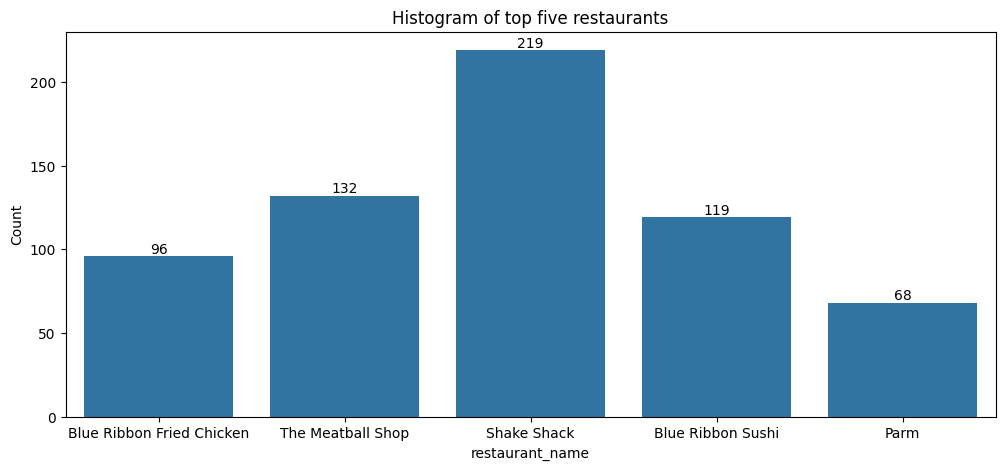

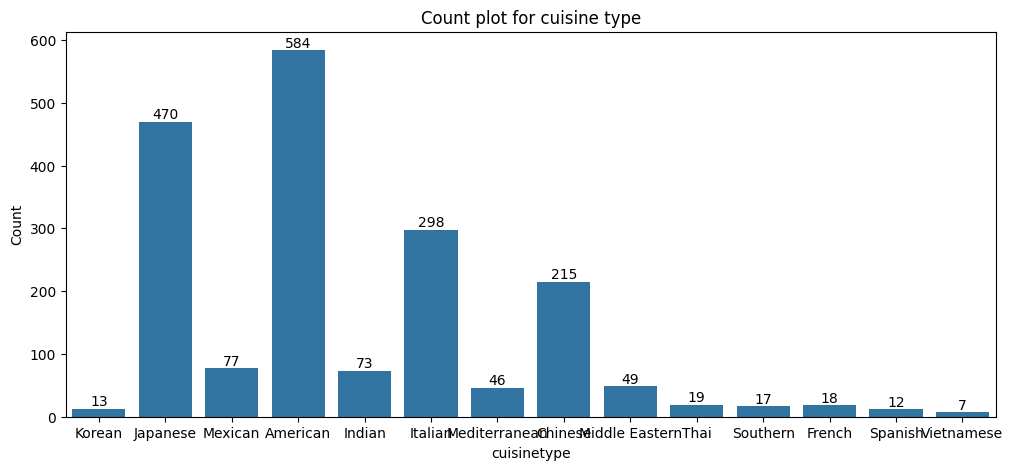

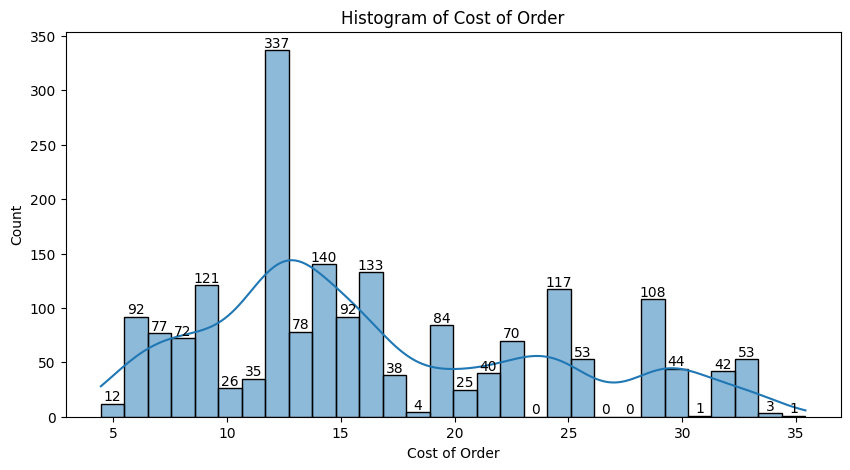

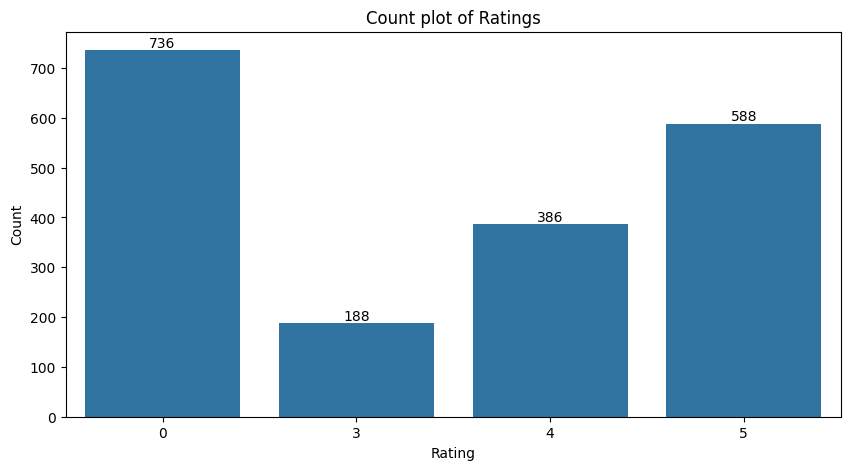

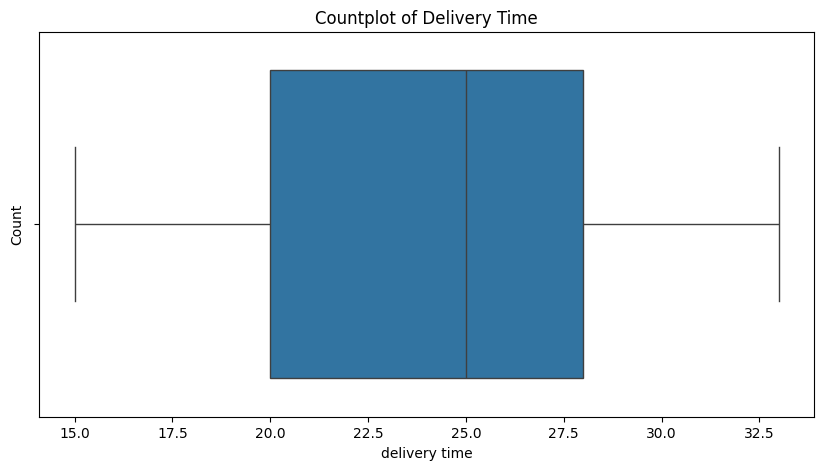

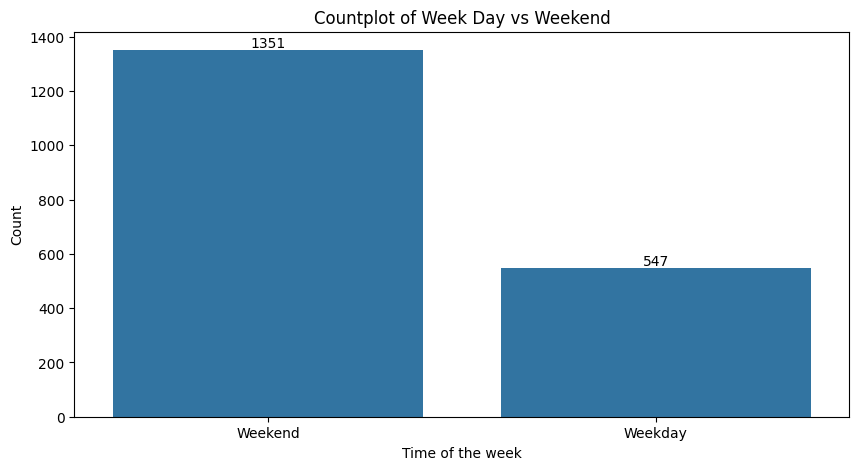

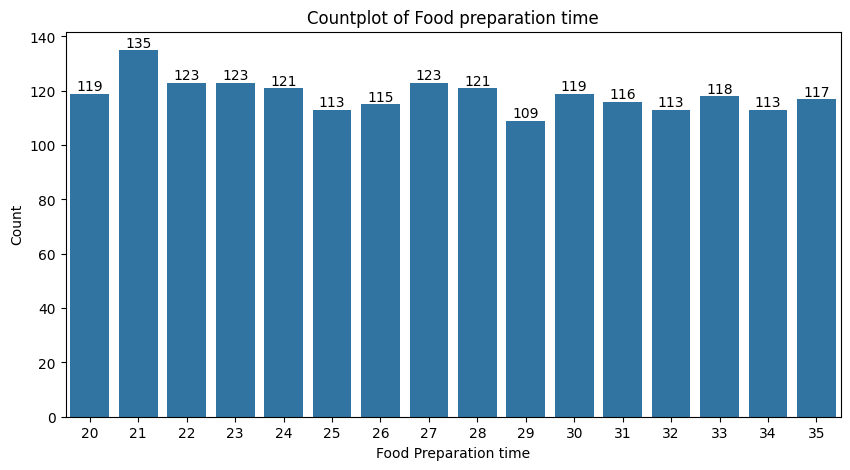

In [ ]:

   #count plot for top 5 restaurant
 #get top 5 values
top5_restaurants = df_copy['restaurant_name'].value_counts().nlargest(5).index
df_top5 = df_copy[df_copy['restaurant_name'].isin(top5_restaurants)]
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df_top5, x=df_top5['restaurant_name'])
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
# Add labels and title
plt.title(f'Histogram of top five restaurants')
plt.ylabel('Count')
plt.xlabel('restaurant_name')
plt.show()

  #Count plot for Cuisine Type
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df_copy, x=df_copy['cuisine_type'])
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.xlabel('cuisinetype')
plt.ylabel('Count')
plt.title(f'Count plot for cuisine type')
plt.show()


  #histogram of cost of order
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df_copy, x=df_copy['cost_of_the_order'], bins=30, kde=True)
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
# Add labels and title
plt.title(f'Histogram of Cost of Order')
plt.ylabel('Count')
plt.xlabel('Cost of Order')
plt.show()


  #Count plot for rating
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_copy, x=df_copy['rating'])
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title(f'Count plot of Ratings')
plt.show()

  #Box Plot for Delivery Time
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=df_copy['delivery_time'], data=df_copy)
# Add labels and title
plt.xlabel('delivery time')
plt.ylabel('Count')
plt.title('Countplot of Delivery Time')
plt.show()

  #count Plot for Day of the week
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df_copy['day_of_the_week'], data=df_copy)
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
# Add labels and title
plt.xlabel('Time of the week')
plt.ylabel('Count')
plt.title('Countplot of Week Day vs Weekend')
plt.show()

  #Pie Chart Plot for preparation Time
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df_copy['food_preparation_time'], data=df_copy)
#to display count on top of bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
# Add labels and title
plt.xlabel('Food Preparation time')
plt.ylabel('Count')
plt.title('Countplot of Food preparation time')
plt.show()





OBSERVATION:
- Top restaurant is Shake Shack with 219 orders
- American, Japanese and Italian are the highest ordered cuisine types
- Most orders are less than $20
- Very high number of unrated deliveries
- Bulk of deliveries are between 20 and 27 minutes
- More orders are made on weekend

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#counting number of restaurants by name
restaurant_count = df_copy['restaurant_name'].value_counts()

#returning the top five of the list
restaurant_count.head()








Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
5 top restaurants are:
Shake Shack                  219,
The Meatball Shop            132,
Blue Ribbon Sushi            119,
Blue Ribbon Fried Chicken     96,
Parm                          68,

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#Counting the recurrence of order cuisine type with day "Weekend"
most_popular_weekend_cuisine = df_copy['cuisine_type'][df_copy['day_of_the_week']=='Weekend'].value_counts()

#returning the most popular
most_popular_weekend_cuisine.head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
Most Popular Weekend Cuisine is: American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#orders over $20
orders_over_20 = df[df_copy['cost_of_the_order']>20]

#(number of rows of orders>20)/(total number of rows of orders)
percentage_orders_over_20 = (orders_over_20.shape[0]/df_copy.shape[0])*100

#round to 2 decimal places
round(percentage_orders_over_20,2)

29.24

#### Observations:
Percentage of orders more than $20: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = round(df_copy['delivery_time'].mean(),2)

print(f"Mean order deliver time: {mean_delivery_time} minutes")

Mean order deliver time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# top three most frequent customers
frequent_customers = df_copy['customer_id'].value_counts()
print(f"Top three customers are : \n {frequent_customers.head(3)}")

Top three customers are : 
 52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:

Customers with ID 52832, 47440, and 83287 are the most frequent


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


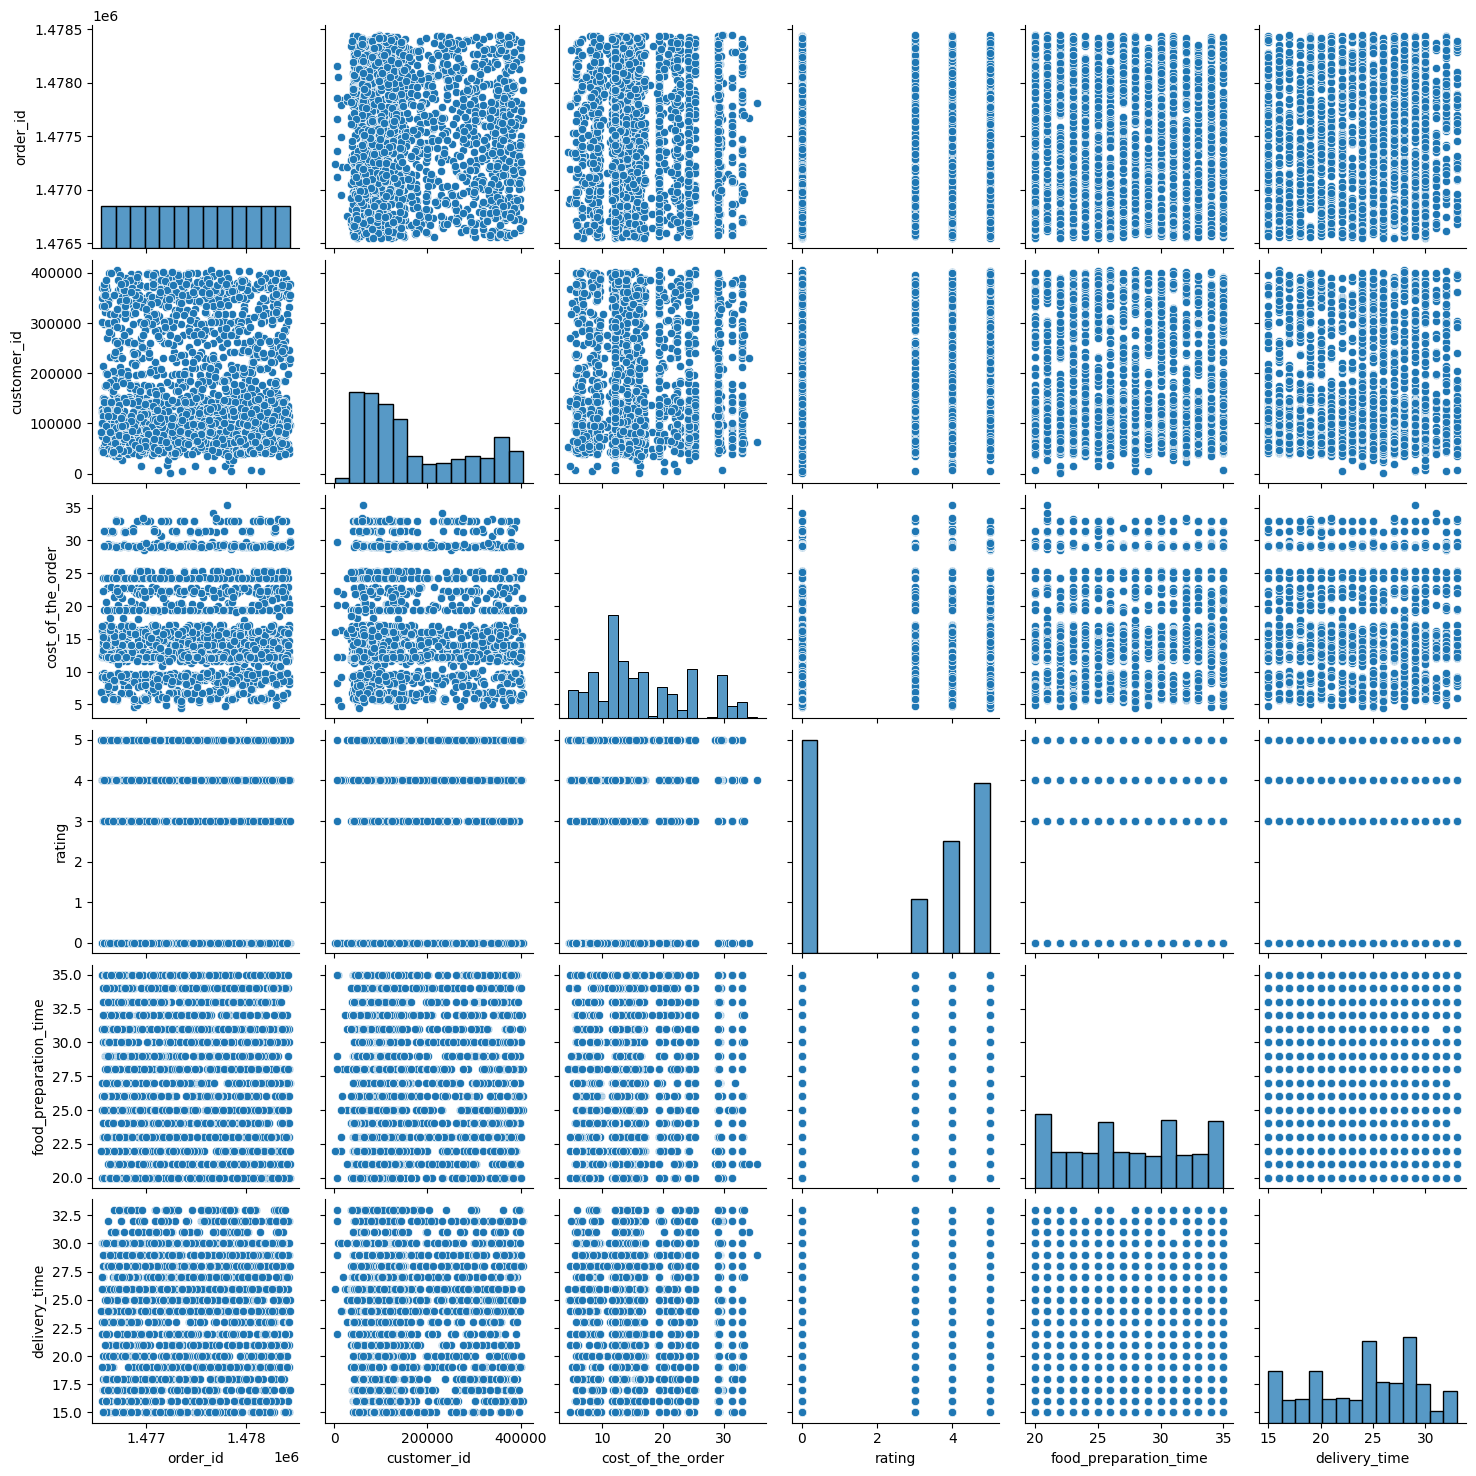

In [ ]:
#creating a pairplot to see any correlation between numerical values
sns.pairplot(df_copy)

There is no strong correlation in the plots above

<ipython-input-85-aa8383e3e13f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')


<Axes: >

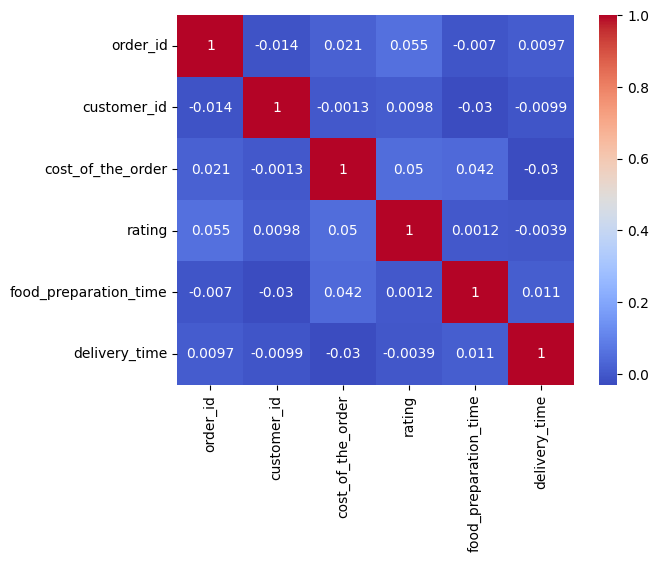

In [ ]:

sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')


There is no strong correlation in the plots above

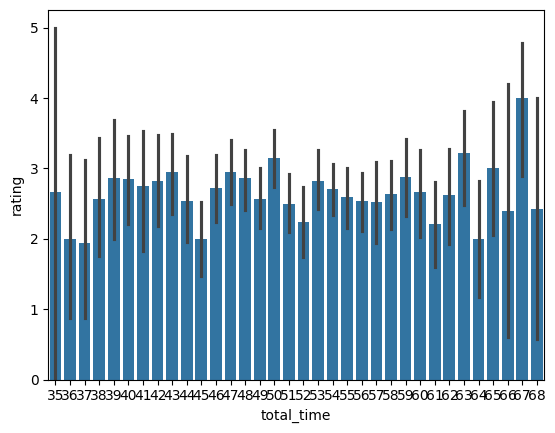

In [ ]:
df_total = df_copy.copy()#making copy of the data

#creating a new column which is the addition of food preparation and delivery time
df_total['total_time']=df_total['food_preparation_time']+df_total['delivery_time']

#A bar plot to show the relationship between the total delivery time and ratings
sns.barplot(x='total_time', y='rating', data=df_total, estimator=np.mean)
plt.show()

This shows that very slow or very high delivery times get more ratings

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#getting unique names of restaurant into a list
restaurant_names = df_copy['restaurant_name'].unique().tolist()

# creating an empty dictionary to collect restaurant ratings
restaurant_rating={'name':[],'no_rating':[],'rate_average':[]} #restaurant name, number of ratings, average rating

# collecting restaurant rating into dictionary
for restaurant in restaurant_names:
  restaurant_rating['name'].append(restaurant)

  #adding number of ratings
  restaurant_rating['no_rating'].append(len(df_copy[(df_copy['restaurant_name']==restaurant)&(df_copy['rating']!=0)]))

  #calculating the average rating of restaurant being (sum of ratings)/(total number of ratings)
  restaurant_rating['rate_average'].append(df_copy[(df_copy['restaurant_name']==restaurant)]['rating'].sum()/(len(df_copy[(df_copy['restaurant_name']==restaurant)&(df_copy['rating']!=0)])))

# making dictionary dataframe
rest_rate_data = pd.DataFrame(restaurant_rating)

#Selecting restaurants to meet criteria
advertising_restaurants = rest_rate_data[(rest_rate_data['no_rating']>50)&(rest_rate_data['rate_average']>4)]

print(f"{advertising_restaurants}")





<ipython-input-106-cb3e114604c2>:15: RuntimeWarning: invalid value encountered in long_scalars
  restaurant_rating['rate_average'].append(df_copy[(df_copy['restaurant_name']==restaurant)]['rating'].sum()/(len(df_copy[(df_copy['restaurant_name']==restaurant)&(df_copy['rating']!=0)])))


                         name  no_rating  rate_average
3   Blue Ribbon Fried Chicken         64      4.328125
6           The Meatball Shop         84      4.511905
14                Shake Shack        133      4.278195
17          Blue Ribbon Sushi         73      4.219178


#### Observations:
4 restaurants matched the qualifying criteria. Blue Ribbon Fried Chicken, The Meatball Shop, Shake Shack, and Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
max_price = 20
min_price = 5

ordercost_over_20 = df_copy[(df_copy['cost_of_the_order']>max_price)]['cost_of_the_order'].sum()
ordercost_over_5 = df_copy[(df_copy['cost_of_the_order']<max_price)&(df_copy['cost_of_the_order']>min_price)]['cost_of_the_order'].sum()
charges_25_percent = ordercost_over_20*.25
charges_15_percent = ordercost_over_5*.15
net_revenue = charges_25_percent+charges_15_percent

print(f"{net_revenue}")

6166.303


#### Observations:
Total revenue = 6166.30 USD

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df_total = df_copy.copy()#making copy of the data

#creating a new column which is the addition of food preparation and delivery time
df_total['total_time']=df_total['food_preparation_time']+df_total['delivery_time']

orders_over_60_min = df_total[(df_total['total_time'])>60]
#percentage of orders is (total number of orders over 60)/(total number of orders)
percentage_of_over_60_minute_orders = (len(orders_over_60_min)/len(df_total))*100

print(f"{round(percentage_of_over_60_minute_orders,2)}%")

10.54%


#### Observations:
Percentage of orders over 60 minutes are 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#delivery  of orders on weekends
weekend_orders = df_copy[(df_copy['day_of_the_week']=='Weekend')]
#calculating weekend mean time
mean_time_weekend_orders = round(weekend_orders['delivery_time'].mean(),2)

#delivery  of orders on weekdays
weekday_orders = df_copy[(df_copy['day_of_the_week']=='Weekday')]
mean_time_weekday_orders = round(weekday_orders['delivery_time'].mean(),2)

print(f"Delivery average time on weekends is:{mean_time_weekend_orders}\n Delivery average time on Weekdays is:{mean_time_weekday_orders} ")


Delivery average time on weekends is:22.47
 Delivery average time on Weekdays is:28.34 


#### Observations:
Deliveries are usually faster on weekends at an average of 22 minutes compared to weekdays at an avergae of 28 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Food preparation and delivery times have an effect on reviews
- Weekends have higher orders
- The highest revenue generators are American cuisine


### Recommendations:

- Create incentives like discounts to get more reviews from customers. Currently there is a large number of no reviews which can give more information on your resaurants
- Sign on more American cuisine restaurants
- Since the bulk of orders are below 20 dollars, they can consider charging 25percent on orders over $15 to increase revenue. (More studies have to be conducted)

---